# Центральная предельная теорема своими руками

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as sts
%matplotlib inline

## Распределение хи-квадрат

Получить представление про распределение хи-квадрат можно, например, [здесь](https://ru.wikipedia.org/wiki/Распределение_хи-квадрат)

Математическое ожидание распределения $\chi^2$ с $k$ степенями свободы: $E[x] = k$ 

Дисперсия распределения $\chi^2$ с $k$ степенями свободы: $D[x] = 2k$ 

В расчётах будем использовать $k = 4$. Вычислим математическое ожидание и дисперсию:

In [5]:
# Вычислим математическое ожидание и дисперсию для k = 4
k = 4.
E = k
D = 2*k
print E, D

4.0 8.0


Таким образом, $$E[x] = 4,$$ $$D[x] = 8$$

Сгенерируем выборку объёмом 1000 из распределения $\chi^2$ с четырьмя степенями свободы.

/Users/admin/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


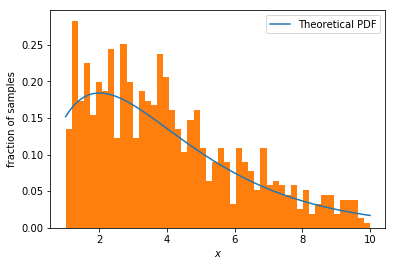

In [6]:
# Задаём функцию
chi_sq = sts.chi2(k)

# Генерируем выборку
sample = chi_sq.rvs(1000)

# Задаём массив точек для построения графика
x = np.linspace(1, 10, 1000)

# Вычисляем значение плотности распределения
pdf = chi_sq.pdf(x)

# Строим график теоретической плотности распределения
plt.plot(x, pdf, label='Theoretical PDF')

# Строим гистограмму выборки
plt.hist(sample, bins = 50, range=(1,10), normed=True)

plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.legend(loc='best')

## Оценка распределения выборочного среднего при разных объёмах выборок

In [15]:
# Функция генерирует N выборок объёма n из распределения statfun и возвращает массив выборочных средних выборок

def generate_means(n, statfun, N):  
    means = np.array([]) # Массив выборочных средних

    for i in range(N):
        means = np.append(means, sum(chi_sq.rvs(n))/n) # Вычисляем выборочное среднее
                                                       # и добавляем выборочное среднее в массив
    return means

In [23]:
# Функция задаёт аппроксимирующее нормальное распределение для выборки means объёма n с параметрами
# исходного распределения statfun мат. ожиданием E и дисперсией D и отрисовывает гистограмму и график

def approximate_norm(means, n, E, D):
    # Определим параметры нормального распределения,
    # описывающего массив выборочных средних при n

    # Математическое ожидание
    En = E
    # Дисперсия
    Dn = D / n
    # Среднеквадратическое отклонение
    sigma = math.sqrt(Dn)

    print 'Математическое ожидание и среднеквадратическое отклонение:', En, sigma

    # Задаём нормальное распределение
    norm = sts.norm(En, sigma)

    # Вычисляем значение плотности распределения
    pdf = norm.pdf(x)

    # Строим график плотности распределения
    plt.plot(x, pdf, label='PDF (n=%i)' % n)

    # Строим гистограмму выборки
    plt.hist(means, bins = 100, range=(1, 10), normed=True)

    plt.ylabel('fraction of samples')
    plt.xlabel('$x$')
    plt.legend(loc='best')

### при n = 3

Сгенерируем 1000 выборок объёмом 3 из распределения $\chi^2$ с четырьмя степенями свободы и построим гистограмму распределения их выборочных средних.

При этом параметры нормального распределения, описывающего выборку, можно вычислить по формулам: $$\mu = E[x],$$ $$\sigma = \sqrt{\frac{D[x]}{n}}$$

Для $n = 3$: $$\mu = 4, \sigma \approx 1.63$$

Математическое ожидание и среднеквадратическое отклонение: 4.0 1.63299316186


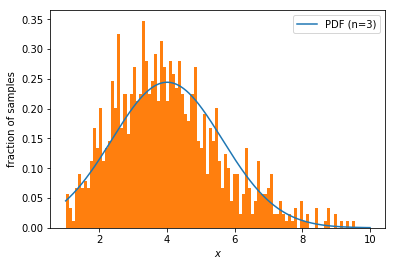

In [24]:
n = 3
N = 1000
means = generate_means(n, chi_sq, N) # Сгенерируем выборку

approximate_norm(means, n, E, D) # Построим гистограмму выборки и график плотности нормального распределения
                                 # её аппроксимирующий

### при n = 7

Сгенерируем 1000 выборок объёмом 7 из распределения $\chi^2$ с четырьмя степенями свободы и построим гистограмму распределения их выборочных средних.

При этом параметры нормального распределения, описывающего выборку, можно вычислить по формулам: $$\mu = E[x],$$ $$\sigma = \sqrt{\frac{D[x]}{n}}$$

Для $n = 7$: $$\mu = 4, \sigma \approx 1.07$$

Математическое ожидание и среднеквадратическое отклонение: 4.0 1.06904496765


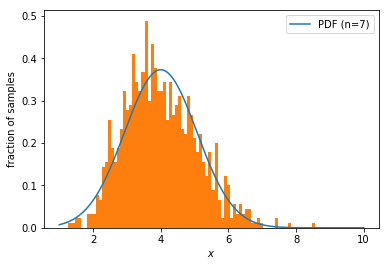

In [25]:
n = 7
N = 1000
means = generate_means(n, chi_sq, N) # Сгенерируем выборку

approximate_norm(means, n, E, D) # Построим гистограмму выборки и график плотности нормального распределения
                                 # её аппроксимирующий

### при n = 50

Сгенерируем 1000 выборок объёмом 50 из распределения $\chi^2$ с четырьмя степенями свободы и построим гистограмму распределения их выборочных средних.

При этом параметры нормального распределения, описывающего выборку, можно вычислить по формулам: $$\mu = E[x],$$ $$\sigma = \sqrt{\frac{D[x]}{n}}$$

Для $n = 50$: $$\mu = 4, \sigma \approx 0.4$$

Математическое ожидание и среднеквадратическое отклонение: 4.0 0.4


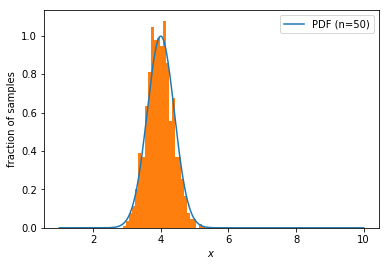

In [26]:
n = 50
N = 1000
means = generate_means(n, chi_sq, N) # Сгенерируем выборку

approximate_norm(means, n, E, D) # Построим гистограмму выборки и график плотности нормального распределения
                                 # её аппроксимирующий

### при n = 500

Сгенерируем 1000 выборок объёмом 500 из распределения $\chi^2$ с четырьмя степенями свободы и построим гистограмму распределения их выборочных средних.

При этом параметры нормального распределения, описывающего выборку, можно вычислить по формулам: $$\mu = E[x],$$ $$\sigma = \sqrt{\frac{D[x]}{n}}$$

Для $n = 500$: $$\mu = 4, \sigma \approx 0.13$$

Математическое ожидание и среднеквадратическое отклонение: 4.0 0.126491106407


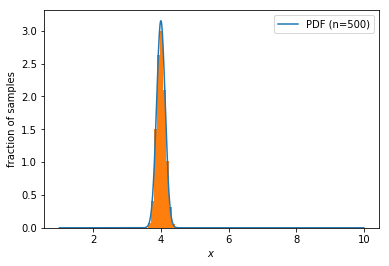

In [27]:
n = 500
N = 1000
means = generate_means(n, chi_sq, N) # Сгенерируем выборку

approximate_norm(means, n, E, D) # Построим гистограмму выборки и график плотности нормального распределения
                                 # её аппроксимирующий

## Выводы

В процессе работы были сгенерированы выборки объёмом 1000 для $n = 3, 7, 50, 500$, рассчитаны и занесены в массивы их выборочные средние, по значениям из массивов были построены гистограммы распределения выборочных средних. Рассчитаны параметры для аппроксимации нормальным распределением выборки выборочных средних для каждого значения $n$ и построены графики плотности аппроксимирующего нормального распределения для каждого значения $n$.

По полученным графикам можно сделать следующие выводы. Точность аппроксимации выборочного среднего значения непрерывной случайной величины, описываемой распределением $\chi^2$, при увеличении $n$ повышается. В силу несимметричности плотности распределения $\chi^2$ относительно математического ожидания (даже при $k = 4$) при $n = 3, 7$ наблюдаются пики на гистограмме левее математического ожидания нормального распределения. Их можно сгладить увеличением $n$, например, в данном случае качество аппроксимации выборочного среднего значительно повышается при $n = 50$ или при $n = 500$.